# networkx Part 1 : Undirected graphs and drawing

<font color='blue'><b>Goals of this notebook:</b></font>
Learn how to create and draw undirected, unlabeled graphs.

<font color='blue'><b>Python packages required:</b></font>
`networkx`

<font color='blue'><b>Additional resources:</b></font> 
For more on networkx including examples and tutorials, see https://networkx.github.io/documentation/stable/.
For more on graph drawing, see https://networkx.github.io/documentation/stable/reference/drawing.html.
For a list of algorithms supported by `networkx`, see https://networkx.github.io/documentation/stable/reference/algorithms/index.html.

Graphs are ways of representing relationships between objects. 
A graph consists of two components: a set of nodes (sometimes called vertices) and a set of edges that connect the nodes.
We can build graphs in Python using three steps.

<b>Step 1: Import Python's toolbox for graphs.</b> 
This toolbox is called `networkx`. 

<b>Step 2: Create an empty graph.</b>
An empty graph is just the graph that contains no nodes or edges.

<b>Step 3: Add nodes and edges.</b>

Let's use the the following example to demonstrate <b>Steps 1-3</b>.

$$
\begin{array}{rcl}
\text{Nodes} &=& \{1, 2, \dotsc, 7\}\\
\text{Edges} &=&\{\{i,j\} : ~~ |i - j| \equiv 1\pmod{5} ~~\text{or} ~~ |i - j| \equiv 2\pmod{5}\}.
\end{array}
$$

<font color='red'><b>Note:</b></font> 
We can label each node with anything we choose, e.g., a number, a letter, or a name.

#### Steps 1 and 2. Loading networkx and creating an empty graph

The first thing to do is load `networkx` using the command

`import networkx as nx`

After loading `networkx`, we can create an empty graph named `G` with the command 

`G = nx.Graph()`

Feel free to replace `G` with the name that you want for your graph.

Run the following line of code to import `networkx` and create `G`.

In [5]:
# Load networkx
import networkx as nx

# Create an empty graph
G = nx.Graph()

#### Step 3. Adding nodes and edges 

There are many ways to add nodes to `G`.
We add the node labeled `v` to `G` using the command 

`G.add_node(v)` 

We can view the nodes of `G` using the command `G.nodes`.

Run the following line of code to add node labeled `1` and print the node list. 

In [6]:
# Add one node to G
G.add_node(1)

# Print the node list
print(f'The nodes of G are {G.nodes}.')

The nodes of G are [1].


We can add multiple nodes using the command `G.add_nodes_from()`.
If we want to add nodes `2,3,4,5` to `G`, then we using the command 

`G.add_nodes_from([2,3,4,5])`

<font color='red'><b>Note:</b></font> The nodes that we add are inserted in `G.add_nodes_from()` using a Python list. Therefore, we can also add the nodes `2,3,4,5` using `G.add_nodes_from(range(2,6))`.

Run the following line of code to add node labeled `2` through `5` and print the node list.

In [7]:
# Add multiple nodes to G
G.add_nodes_from([2,3,4,5])

# Print the nodes
print(f'The nodes of G are {G.nodes}.')

The nodes of G are [1, 2, 3, 4, 5].


A third way to add a node is to add an edge containing the node.
Notice that the last two nodes that we need to add, `6` and `7`, form an edge in `G`. 
We can add one edge at a time using the command `G.add_edge()` with the two nodes of the edge inserted in `()`.
Therefore, the command 

`G.add_edge(6,7)` 

will add the nodes `6` and `7` <i>and</i> add the edge `(6,7)`.

We can access the current edge list using the command `G.edges`.
 
Run the following line of code to add nodes `6` and `7` and print the nodes and edges.

In [8]:
# Add nodes to G by adding an edge
G.add_edge(6,7)

# Print the nodes
print(f'The nodes of G are {G.nodes}.')

# Print the edges
print(f'The edges of G are {G.edges}.')

The nodes of G are [1, 2, 3, 4, 5, 6, 7].
The edges of G are [(6, 7)].


The command `G.add_edge()` adds one edge to `G`. 
We can add multiple edges using the command `G.add_edges_from()` with the edges inserted in `()` in a list.
For example, the command

`G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])`

will add the edges `(1,2), (2,3), (3,4)` and `(4,5)` to `G`.

Run the following line of code to add these edges to `G` and print the edges.

In [9]:
# Add multiple edges
G.add_edges_from([(1, 2), (2,3), (3,4), (4,5)])

# Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(1, 2), (2, 3), (3, 4), (4, 5), (6, 7)].


It is important to know that we can also remove nodes and edges from a graph. 
The command to remove a node is `G.remove_node()`, and the command to remove an edge is `G.remove_edge()`.
For example, the command

`G.remove_edge(1, 2)`

removes the edge `(1,2)` from `G`.
We can also use the commands `G.remove_nodes_from()` and `G.remove_edges_from()`.

Run the following line of code to remove the edge `(1, 2)` from `G` and print the edges.

In [10]:
# Removing edges
G.remove_edge(1, 2)

#Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(2, 3), (3, 4), (4, 5), (6, 7)].


We can add the remaining edges of `G` by looping through all nodes and checking if they form an edge of `G`.
We can loop through the nodes of `G` using 

`for i in G.nodes`

Run the following line of code to add the remaining edges to `G` and print the edges.

In [11]:
# Create the remaining edges of G
for i in G.nodes:
    for j in G.nodes:
        if abs(i-j) % 5 == 1 or abs(i-j) % 5 == 2 :
            G.add_edge(i,j)
            
# Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(1, 2), (1, 3), (1, 7), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)].


Congratulations!
You have succesfully created a graph using `networkx`. 

We can now examine the nodes and edges of `G`.
Let's explore how by searching for triangles in `G`.

<font color='red'><b>Note:</b></font> The Python package `itertools` allows us to quickly loop over tuples of a set.
As an example, the double loop above could be replaced by

    from itertools import combinations

    for pair in combinations(G.nodes,2):
        if abs(pair[0]-pair[1]) % 5 == 1 or abs(pair[0]-pair[1]) % 5 == 2:
            G.add_edge(pair[0], pair[1])

The previous code loops through all `combinations` of `G.nodes` of size `2`. 

### Example: Finding triangles in a graph

A triangle in a graph is three nodes that are all connected by an edge.
One way to check if `G` has a triangle is to check every triple of nodes and see if they are adjacent.
The command 

`(i,j) in G.edges` 

returns `True` if `(i,j)` is an edge of `G`.

Run the following line of code to check if `G` contains a triangle. We also print any triangles found.

In [12]:
# Import the itertools to quickly loop through triples
from itertools import combinations

# Loop through triples
for tri in combinations(G.nodes,3):
    # Check if there is a triangle. 
            if (tri[0],tri[1]) in G.edges and (tri[0],tri[2]) in G.edges and (tri[1],tri[2]) in G.edges:
                print(f'G contains the triangle {tri}.')

G contains the triangle (1, 2, 3).
G contains the triangle (2, 3, 4).
G contains the triangle (3, 4, 5).
G contains the triangle (4, 5, 6).
G contains the triangle (5, 6, 7).


<font color='red'><b>Note:</b></font> Another way of checking if an edge exists is to check if one node contains another node in its <i>adjacency list</i>.
The adjacencies of `G` can be accessed using `G.adj`.
The specific neighbors of a node can be accessed using the command `G.adj[v]`, where `v` is the node whose neighbors we want.

Another way to check if a triangle exists in `G` using predefined functions in `networkx`.

The package `networkx` has a command to find all <i>maximal cliques</i> in a graph. 
A clique in a graph is a set of nodes that are all connected (so a triangle is a clique of size 3).
A maximal clique is a clique that cannot be enlarged by adding more nodes. 
The command for this function is 

`clique_list = nx.find_cliques(G)`.

Tha previous command will run the algorithm `nx.find_cliques(G)` and store all maximal cliques as a list in `clique_list`.

<font color='red'><b>Note:</b></font> The `nx.find_cliques()` command is just one example of the many algorithms built into `networkx`! The command makes our lives easier by removing the need of a triple loop.

Run the following line of code to find all of the cliques in `G` and print all the triangles.

In [13]:
# Use the predefined command nx.find_cliques
clique_list = nx.find_cliques(G)

for clique in clique_list:
    if len(clique) == 3:
        print(f'G contains the triangle {clique}.')

G contains the triangle [3, 2, 1].
G contains the triangle [3, 2, 4].
G contains the triangle [3, 5, 4].
G contains the triangle [6, 5, 4].
G contains the triangle [6, 5, 7].


# Drawing graphs

It is often helpful for us to visualize a graph. 
The `networkx` package can be used to plot graphs. 

<font color='red'><b>Note:</b></font> Graph drawing is difficult and it is not easy to draw a graph in `networkx` precisely how we want. 

We can draw `G` using the command 

`nx.draw(G, with_labels=True, node_color = 'lightblue')`

There is one mandatory input and many optinonal inputs to this function.

`G` : This is the name of the graph that we want to draw. It is mandatory.

`with_labels = True` : This shows the labels of our nodes. This is an optional input. If we have many nodes, then it might be helpful to remove this input.

`node_color = 'lightblue'`: This adjusts the color of the nodes.

Run the following cell to draw `G`.

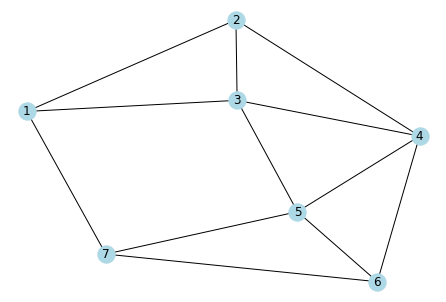

In [14]:
# This magic command is for drawing inline in the Jupyter Notebook. It has to be executed once for the full notebook.
%matplotlib inline

# Draw G
nx.draw(G, with_labels=True, node_color = 'lightblue')

# Note: There might be a deprecation warning appearing; it comes from code in the networkx package, so we cannot do much about it.

One very useful optional input is the position of the nodes. 
If we do not specify positions, then `nx.draw()` will draw the nodes in different places everytime we run it!
You can test this for yourself by re-running the previous command.
 
It is useful to choose positions because we will later use these positions to draw other things on our graph such as edge weights.
These positions can be manually created, but `networkx` has a collection of positions to choose from. 
The line of code 

`node_pos =  nx.circular_layout(G)` 

chooses the `circular_layout` positioning.
We add this positioning to our nodes by adding 

`pos = node_pos` 

as an input to the `nx.draw()` command. 

<font color='red'><b>Note:</b></font> Some layouts in `networkx` create new positions every time that it is run. Therefore, you should only run these command once and reference the position later using `node_pos`!
If you do this, then every time you draw `G` the nodes will be in the same position.

Run the following lines of code to set the node positions.

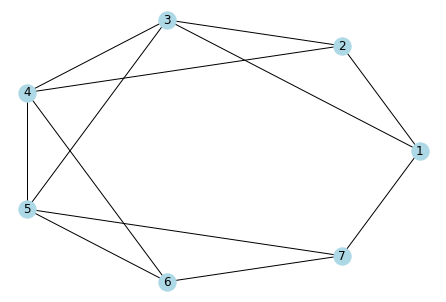

In [15]:
# Fix a position of the nodes
node_pos =  nx.circular_layout(G)

# Draw G with fixed positions
nx.draw(G,with_labels=True, pos = node_pos, node_color = 'lightblue')

Good job!
At this point, we have seen how to create undirected graphs and draw them.
It turns out that we can already run many common graph algorithms with these commands. 
Let's finish this tutorial by introducing some of these algorithms to practice what we have learned.

#### Example: Induced subgraphs

An induced subgraph of `G` contains the relationships for a certain subset of the nodes. 
Recall that the edges of an <i>induced</i> subgraph are those edges with both endpoints in the induced node set.
Suppose that we want to draw the subgraph of `G` induced by the nodes of `G` of degree 3. 

Given a set `L` of nodes of `G`, we can use the command 

`H = G.subgraph(L)` 

to create the subgraph induced by `L`.

We can access the degree of a node labeled `v` using the command `G.degree[v]`.

Run the following command to create `H` and draw it using the same node positions as before.

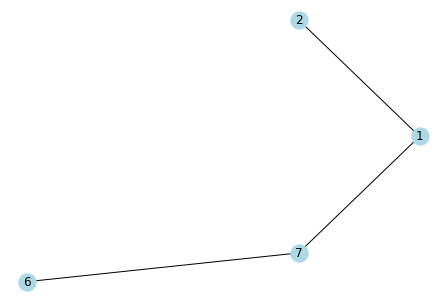

In [16]:
# Find the nodes of G of degree 3
deg_3_nodes = [i for i in G.nodes if G.degree[i]==3]

# Create H using these nodes
H = G.subgraph(deg_3_nodes)

# Draw H
nx.draw(H,with_labels=True, pos = node_pos, node_color = 'lightblue')

#### Example: Matchings

A <i>matching</i> is a set of edges of `G` such that no two edges share a node.
Out of all matchings in `G`, a <i>maximum matching</i> is a matching with the largest number of edges.
We can find a maximum matching in a graph using the command 

`M = nx.max_weight_matching(G)`

This command returns a set of edges `M` in the matching.

<font color='red'><b>Note:</b></font> The command `nx.max_weight_matching(G)` finds a so-called maximum weight matching. At this moment, you do not need to know what a maximum weight matching is, and we will consider these in part 3 of the tutorial. If we run the command as stated here, then we find a maximum matching.

Run the following code to find a maximum matching in `G` and print the edges.

In [17]:
# Find a maximum matching in G
M = nx.max_weight_matching(G)

print(f'A maximum matching in G is {M}.')

A maximum matching in G is {(4, 5), (6, 7), (2, 3)}.


We can draw `G` with only the edges of `M`.
We do this by adding the optional input 

`edgelist = M` 

into the `nx.draw()` command.

Run the following command to draw `G` with the edges of `M`. We use the same node positions as before.

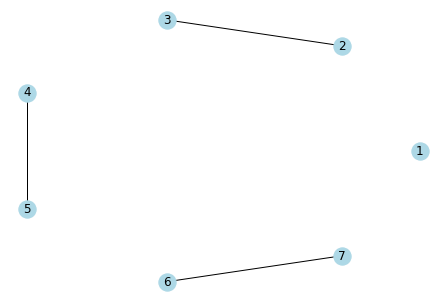

In [18]:
# Draw G with the edges of M
nx.draw(G, pos = node_pos , edgelist = M, 
              with_labels=True, node_color = 'lightblue')

#### Example: Breadth first search

Suppose that we want to run the BFS algorithm on `G` using `1` as a root. 
One method to run BFS is using the command 

`edges_from_BFS = list(nx.bfs_edges(G, 1))`

The previous command runs `nx.bfs_edges(G,1)` and returns the edges found by the BFS algorithm in the order that the BFS algorithm found them.

<font color='red'><b>Note:</b></font> The command `nx.bfs_edges(G,1)` returns a data structure called a generator. You do not need to know what this is. We use `list(nx.bfs_edges(G, 1))` in order to transform it into something more familiar.

Run the following code to run BFS on `G` starting at `1`. We print the edges and nodes in the order they are visited.

In [19]:
# Run BFS on G with root node 1
edges_from_BFS = list(nx.bfs_edges(G, 1))

# Print the edges from the BFS algorithm
print(f'Here are the edges that BFS finds if we start at 1 :{edges_from_BFS}.')

# Print the nodes from the BFS algorithm
nodes_from_BFS = [1] + [v for u, v in edges_from_BFS]
print(f'Here are the nodes that BFS finds if we start at 1: {nodes_from_BFS}.')

Here are the edges that BFS finds if we start at 1 :[(1, 2), (1, 3), (1, 7), (2, 4), (3, 5), (7, 6)].
Here are the nodes that BFS finds if we start at 1: [1, 2, 3, 7, 4, 5, 6].


Finally, we can draw `G` with only the edges visited by `BFS`. 

Run the following command to draw `G` with the edge list `edges_from_BFS`. 

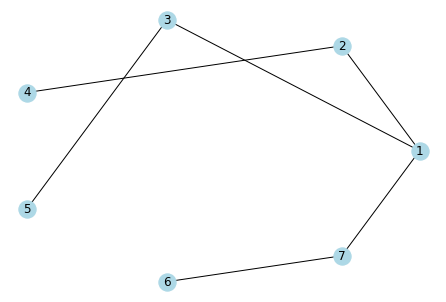

In [20]:
# Draw G with the edges of M
nx.draw(G, pos = node_pos , edgelist = edges_from_BFS, 
              with_labels=True, node_color = 'lightblue')

## Conclusions

`networkx` has many tools for creating and drawing graphs, and running graph algorithms. This tutorial gives a small sample of these commands. See part 2 of this tutorial to learn about directed graphs.